# P7 SCORING: Modeling

In [91]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from fonctions_eda import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit, cross_validate, train_test_split, validation_curve, learning_curve, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn import set_config
from lightgbm import LGBMClassifier
from yellowbrick.classifier import ClassificationReport, ROCAUC, PrecisionRecallCurve, ConfusionMatrix
from yellowbrick.model_selection import FeatureImportances
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import imblearn
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import os
import sys
import time
import shap
shap.initjs()

This project was made with:
* Python 3.8.8
* Matplotlib 3.4.2
* Pandas 1.2.4
* Numpy 1.20.1
* Seaborn 0.11.1
* Yellowbrick 1.3.post1
* Scikit-learn 0.24.1
* Imblearn 0.8.1
* LightGBM 3.3.2
* Plotly 5.3.1
* Shap 0.40

Chek your version number:

In [2]:
print("Python", sys.version_info.major, ".", sys.version_info.minor)
print("Matplotlib", mpl.__version__)
print("Pandas", pd.__version__)
print("Nympy", np.__version__)
print("Seaborn", sns.__version__)
print("Imblearn", imblearn.__version__)

Python 3 . 8
Matplotlib 3.4.2
Pandas 1.2.4
Nympy 1.20.1
Seaborn 0.11.1
Imblearn 0.8.1


In [3]:
# For a better visualisation:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
pd.set_option('display.float_format', '{:.5f}'.format)
plt.rcParams.update({"figure.titlesize":16, "axes.titlesize":15, "axes.labelsize":14, "xtick.labelsize":14, 
    "ytick.labelsize":14})

* https://www.kaggle.com/sangseoseo/oof-all-home-credit-default-risk
* https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features/script

## 1. Load dataset

Add the path to the file containing the .csv of the project.

In [4]:
path_to_csv = ""

path_data_train_clean_select = os.path.join(path_to_csv, "data_train_clean_select.csv")
path_app_train = os.path.join(path_to_csv, "application_train.csv")
path_bureau = os.path.join(path_to_csv, "bureau.csv")
path_previous_app = os.path.join(path_to_csv, "previous_application.csv")
path_app_prev_train = os.path.join(path_to_csv, "app_prev_train.csv")

data = pd.read_csv(path_data_train_clean_select, encoding="utf-8")
app_train = pd.read_csv(path_app_train, encoding="utf-8")
bureau = pd.read_csv(path_bureau, encoding="utf-8")
previous_app = pd.read_csv(path_previous_app, encoding="utf-8")
app_prev_train = pd.read_csv(path_app_prev_train, encoding="utf-8")

Separate *data* and *target*.

In [5]:
target = data["TARGET"]
data.drop(["Unnamed: 0", "SK_ID_CURR", "TARGET"], axis=1, inplace=True)
data.head()

CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  AMT_ANNUITY  \
0             0      202500.00000  406597.50000  24700.50000   
1             1      171000.00000 1560726.00000  41301.00000   
2             1      112500.00000  652500.00000  21177.00000   
3             0       67500.00000   80865.00000   5881.50000   
4             0      157500.00000  299772.00000  20160.00000   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.01880       -9461     -637.00000        -3648.00000   
1                     0.03579      -13778    -3130.00000        -1213.00000   
2                     0.02280      -10197     -679.00000        -4427.00000   
3                     0.03133      -13439    -2717.00000         -311.00000   
4                     0.02071       -8728    -1157.00000        -3494.00000   

   DAYS_ID_PUBLISH  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0            -2120                     2                            2   
1             -619                     2                            2   
2             -738                     2                            2   
3            -3227                     2                            2   
4            -1368                     3                            3   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       16                           0   
2                       15                           0   
3                       10                           0   
4                        6                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       1                       1                        0   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0       0.08304       0.26295       0.13938                   2.00000   
1       0.77476       0.72400       0.49206                   1.00000   
2       0.31976       0.65186       0.36395                   0.00000   
3       0.46483       0.71504       0.17665                   0.00000   
4       0.11563       0.34663       0.67857                   0.00000   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                   2.00000                   2.00000   
1                   0.00000                   1.00000   
2                   0.00000                   0.00000   
3                   0.00000                   0.00000   
4                   0.00000                   0.00000   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                   2.00000             -1134.00000   
1                   0.00000             -1562.00000   
2                   0.00000              -844.00000   
3                   0.00000             -2370.00000   
4                   0.00000              -925.00000   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0.00000                    0.00000   
1                     0.00000                    0.00000   
2                     0.00000                    0.00000   
3                     0.00000                    0.00000   
4                     0.00000                    0.00000   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_

In [6]:
target.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [7]:
print(f"The dataset has {data.shape[0]} lines and {data.shape[1]} columns.")

The dataset has 80725 lines and 129 columns.


## 2. Data preparation

We select categorical and numerical features, then use `ColumnTransformer` for preprocessing. For now we use simple `OneHotEncoder` and `StandardScaler`.

In [8]:
cat_col = data.select_dtypes(include=["object"]).columns
num_col = data.select_dtypes(exclude=["object"]).columns

print(f"Categorical features : \n{list(cat_col)}")
print("==============================================")
print(f"Numerical features :\n{list(num_col)}")

Categorical features : 
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
Numerical features :
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AM

In [9]:
cat_preprocessor = OneHotEncoder(handle_unknown="ignore")
num_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([("cat_preprocessor", cat_preprocessor, cat_col),
                                 ("num_preprocessor", num_preprocessor, num_col)])

In [10]:
data_transformed = preprocessor.fit_transform(data)

We will get the list of transformed feature names.

In [11]:
# We need to fit the one hot encoder to get the output features names
cat_data = data.select_dtypes(include=["object"])
_ = cat_preprocessor.fit(cat_data)

In [12]:
# Add categorical and numerical features names
feature_names = cat_preprocessor.get_feature_names().tolist() + num_col.tolist()

In [13]:
# Dict to replace categorical feature names
cat_features = {"x0_":"NAME_CONTRACT_TYPE_", "x1_":"CODE_GENDER_", "x2_":"FLAG_OWN_CAR_", "x3_":"FLAG_OWN_REALTY_",
                "x4_":"NAME_INCOME_TYPE_", "x5_":"NAME_EDUCATION_TYPE_", "x6_":"NAME_FAMILY_STATUS_", "x7_":"NAME_HOUSING_TYPE_",
                "x8_":"OCCUPATION_TYPE_", "x9_":"WEEKDAY_APPR_PROCESS_START", "x10_":"ORGANIZATION_TYPE_"}

In [14]:
# Make a single string
new_features_names = ",".join(feature_names)

# Replace
for k, v in zip(cat_features.keys(), cat_features.values()):
    new_features_names = new_features_names.replace(k, v)

# Split to make a list
new_features_names = new_features_names.split(",")
new_features_names

['NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'FLAG_OWN_CAR_N',
 'FLAG_OWN_CAR_Y',
 'FLAG_OWN_REALTY_N',
 'FLAG_OWN_REALTY_Y',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Widow',
 'NAME_HOUSING_TYPE_Co-op apartment',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Office apartment',
 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_HOUSING_TYPE_With parents',
 'OCCUPATION_TYPE_Accountants',
 'OCCUPATION_TYPE

Now we split data for train and test.

In [15]:
# Train test split on transformed data
data_train, data_test, target_train, target_test = train_test_split(data_transformed, target, random_state=42, test_size=0.2)

In [16]:
print("TRANSFORMED DATA")
print("---------------------")
print("Train")
print(f"n rows: {data_train.shape[0]}")
print(f"n columns: {data_train.shape[1]}")
print("Test")
print(f"n rows: {data_test.shape[0]}")
print(f"n columns: {data_test.shape[1]}")

TRANSFORMED DATA
---------------------
Train
n rows: 64580
n columns: 229
Test
n rows: 16145
n columns: 229


Now we use SMOTE to oversample the minority class (non-repaid loans, target=1) to counter the problems coming with unbalanced data.

In [17]:
print(f"Initial data nb lines: {data_train.shape[0]}")

Initial data nb lines: 64580


In [18]:
# Oversampling target=1
oversample = SMOTE()
data_train_smote, target_train_smote = oversample.fit_resample(data_train, target_train)

In [19]:
print(f"Balanced data nb lines: {data_train_smote.shape[0]}")

Balanced data nb lines: 119412


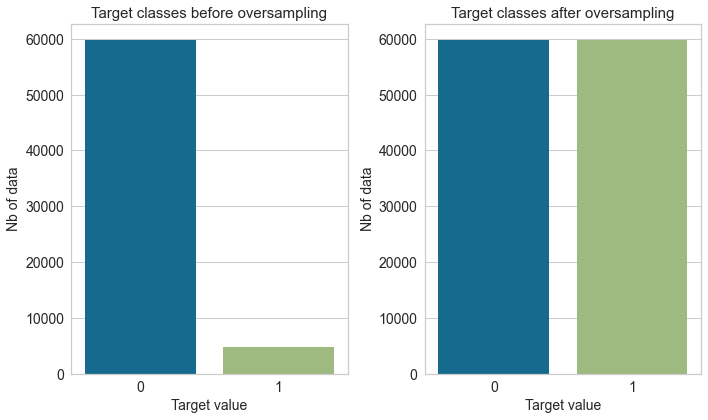

In [20]:
df_before = pd.DataFrame(target_train.value_counts())
df_before = df_before.T

df_after = pd.DataFrame(target_train_smote.value_counts())
df_after = df_after.T

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), tight_layout=True)

sns.barplot(ax=ax1, data=df_before)
ax1.set_xlabel("Target value")
ax1.set_ylabel("Nb of data")
ax1.set_title("Target classes before oversampling")

sns.barplot(ax=ax2, data=df_after)
ax2.set_xlabel("Target value")
ax2.set_ylabel("Nb of data")
ax2.set_title("Target classes after oversampling");

In [21]:
print("TRANSFORMED + SMOTE DATA")
print("---------------------")
print("Train")
print(f"n rows: {data_train_smote.shape[0]}")
print(f"n columns: {data_train_smote.shape[1]}")
print("Test")
print(f"n rows: {data_test.shape[0]}")
print(f"n columns: {data_test.shape[1]}")

TRANSFORMED + SMOTE DATA
---------------------
Train
n rows: 119412
n columns: 229
Test
n rows: 16145
n columns: 229


## 3. Modeling

### 3.1. Functions

In [22]:
def train_eval_clf(estimator, data_train, target_train, data_test, target_test): 
    """
    Train, fit and predict a classification model on already splitted train and test data.
    Return metrics on train and test and classification report.

    estimator: model to fit

    data_train, target_train: df or array of train data and target

    data_test, target_test: df or array of test data and target
    """

    # Fit estimator
    t0 = time.time()
    estimator.fit(data_train, target_train)
    fit_time = time.time() - t0

    # Predict
    target_predicted_train = estimator.predict(data_train)
    target_predicted_test = estimator.predict(data_test)

    # Train metrics
    score_train = estimator.score(data_train, target_train)
    bal_accuracy_train = balanced_accuracy_score(target_train, target_predicted_train)
    recall_train = recall_score(target_train, target_predicted_train, zero_division=0)
    classif_report_train = classification_report(target_train, target_predicted_train, output_dict=True,
                                                    zero_division=0)
    roc_auc_train = roc_auc_score(target_train, target_predicted_train)
    f1_train = f1_score(target_train, target_predicted_train, zero_division=0)
    precision_train = precision_score(target_train, target_predicted_train, zero_division=0)

    # Test metrics
    score_test = estimator.score(data_test, target_test)
    bal_accuracy_test = balanced_accuracy_score(target_test, target_predicted_test)
    recall_test = recall_score(target_test, target_predicted_test, zero_division=0)
    classif_report_test = classification_report(target_test, target_predicted_test, output_dict=True,
                                                    zero_division=0)
    roc_auc_test = roc_auc_score(target_test, target_predicted_test)
    f1_test = f1_score(target_test, target_predicted_test, zero_division=0)
    precision_test = precision_score(target_test, target_predicted_test, zero_division=0)

    # Make dataframe with results
    estimator_name = str(estimator)
    metrics = pd.DataFrame({"estimator_name": [estimator_name],
                            "fit_time": [fit_time],
                            "train_score": [score_train],
                            "train_balanced_accuracy": [bal_accuracy_train], 
                            "train_recall": [recall_train],
                            "train_roc_auc": [roc_auc_train],
                            "train_precision": [precision_train],
                            "train_f1": [f1_train],
                            "test_score": [score_test],
                            "test_balanced_accuracy": [bal_accuracy_test], 
                            "test_recall": [recall_test],
                            "test_roc_auc": [roc_auc_test],
                            "test_precision": [precision_test],
                            "test_f1": [f1_test]
                            })
    classif_reports = {"classif_report_train": classif_report_train,
                        "classif_report_test": classif_report_test}

    return metrics, classif_reports

In [23]:
def multi_clf(estimators_list, data_train, target_train, data_test, target_test):
    """
    Train, fit and evaluate multiple classification models (on already splitted data),
    return a dataframe with train and test metrics.

    estimators_list: list of classification models
    
    data_train, target_train: df or array of train data and target

    data_test, target_test: df or array of test data and target

    """
    all_metrics = pd.DataFrame(columns=["estimator_name", "fit_time", "train_score", "train_balanced_accuracy",
                                        "train_recall", "train_roc_auc", "train_precision", "train_f1", "test_score",
                                        "test_balanced_accuracy", "test_recall", "test_roc_auc", "test_precision",
                                        "test_f1"])
    for estimator in estimators_list:
        print(f"********* Fitting {str(estimator)}... *********")
        metrics, _ = train_eval_clf(estimator, data_train, target_train, data_test, target_test)
        all_metrics = pd.concat([all_metrics, metrics])
    
    all_metrics = all_metrics.sort_values(by="test_roc_auc", ascending=False)

    return all_metrics

In [24]:
def get_all_scores(model_name, cv_results, scoring, train_score=False):
    
    """
    Create a Series containing metrics values from cross-validation output.
    Take in input the model name, the object containing the cross-validation results, 
    the list of metrics used in the CV and a boolean indicating if train scores were returned or not.
    Return a Series with fit time, score time and the mean of each metric defined in list_scores.
    
    model_name: str
        Model name that will be used to fill the first column of the final dataframe.
        
    cv_results:
        Output of a cross-validation.
    
    scoring: list of str
        List of metrics used in the cross-valisation.
    
    train_score: boolean
        Whether the cross-validation contains train scores or not. Default is False.
    
    """
    
    # Make a dataframe of the cross_validation results and set some variables
    cv_results = pd.DataFrame(cv_results)
    validation_scores = []
    train_scores = []
    n = len(scoring)
    
    # Add "test_" to the name of list of metrics
    for i in scoring:
        i = "test_" + i
        validation_scores.append(i)
    
    # Create a Series with basic info
    mean_results = pd.DataFrame([[model_name, cv_results["fit_time"].mean(), cv_results["score_time"].mean()]],
                             columns=["model_name", "fit_time", "score_time"])
    
    # If train score was return by cross_validation, create a list with appropriate names
    if train_score==True:
        for i in scoring:
            i = "train_" + i
            train_scores.append(i)
            
        # Add means for train metrics
        for i in range (0, n):
            mean_results[train_scores[i]] = cv_results[train_scores[i]].mean()
    
    # Add means for validation metrics
    for i in range (0, n):
            mean_results[validation_scores[i]] = cv_results[validation_scores[i]].mean()
    
    return mean_results

In [25]:
def custom_cv(estimator, name_model, data, target, scoring, n_splits=30):
    
    """
    Make a shuffle split followed by a cross-validation.
    Use the get_all_scores function to format the resulting metrics.
    Plot histograms of the mean AUC for train and test sets.
    Return the cross-validation results and Series with metrics.
    
    estimator:
        Estimator to use to fit and predict the target.
    
    name_model: str
        Name of the model that will be used in the Series returning the metrics of the cross-validation.
    
    data:
        Data that will be used in the cross-validation.
    
    target:
        Well... the target.
    
    scoring: list of str
        List of the metrics to use in the cross-validation.
    
    n_splits:
        Number of splits for the cross-validation (default is 30).
    
    """
    
    # Make suffle split and cross-validate
    cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=0)

    cv_results = cross_validate(estimator, data, target, cv=cv, n_jobs=-2, return_estimator=True, 
                                    return_train_score=True, scoring=scoring)
    
    # Format metrics output
    models_summary = get_all_scores(name_model, cv_results, scoring, train_score=True)
    
    cv_results_df = pd.DataFrame(cv_results)
    
    auc = cv_results_df[["train_roc_auc", "test_roc_auc"]]
    
    # Plot histograms of train vs. validation error
    fig, ax = plt.subplots(figsize=(5,5))

    sns.histplot(ax=ax, data=auc, legend=False)
    ax.legend(labels=["Validation", "Train"])
    ax.set_xlabel("AUC")
    ax.set_title("Train vs. Validation set\nDefault credit");
    
    return cv_results, models_summary

In [26]:
def logisticregression_cv(estimator, model_name, data_train, target_train, data_test, target_test):
    
    """
    To use when doing a logistic regression including a cross-validation (LogisticRegressionCV).
    Take in argument estimator, target, and data (already splitted in train and test).
    Display best C found and main metrics, plot of AUC vs. C and yellowbrick visualizations.
    Return evaluation results on the test set.
    store_cv_values must be set to True in the estimator's arguments.
    When evaluating the model on the test set, will use the best parameters found.
    
    estimator:
        Estimator to be used in the modeling. Must specify parameters to test in the 
        estimator's arguments. store_cv_values must be set to True.
        
    model_name: str
        Model name used in return scoring results.
    
    data_train, target_train, data_test, target_test:
        Data used to make the GridSearchCV (train data will be split into train and validation 
        sets for cross-validation incuded into the grid search).
    
    target_name: str
        Target name for display.
    
    """

    est = str(estimator)

    # Fit model:
    print("Fitting model...")
    estimator.fit(data_train, target_train)
        
    # Get best alpha and results of cross-validation:
    if "RidgeClassifierCV" in est:
        print(f"Ridge best alpha: {estimator.alpha_:.3f}")
        cv_results = estimator.cv_values_

        #errors = pd.DataFrame(cv_results)
        #errors.columns = list(alphas)
        #errors_alphas = errors.mean()
        #errors_alphas_std = errors.std()
            
    if "LogisticRegressionCV" in est:
            best_C = estimator.C_[0]
            best_l1_ratio = estimator.l1_ratio_[0]
            print(f"Logistic Regression best C: {best_C:.3f}")
            if best_l1_ratio is not None:
                print(f"Logistic Regression best l1 ratio: {best_l1_ratio:.3f}")
            
            # Get score vs. C Series:
            scores_C = pd.DataFrame(estimator.scores_[1], columns=estimator.Cs_).mean()

    else:
        print(f"Wrong estimator. Function for RidgeClassifierCV or LogisticRegressionCV only.")

    target_predicted = estimator.predict(data_test)
        
    # Get metrics on the test set:
    score_test = estimator.score(data_test, target_test)
    roc_auc = roc_auc_score(target_test, target_predicted)
    accuracy_test = accuracy_score(target_test, target_predicted)
    bal_accuracy_test = balanced_accuracy_score(target_test, target_predicted)
    precision_test = precision_score(target_test, target_predicted, zero_division=0)
    recall_test = recall_score(target_test, target_predicted, zero_division=0)
    f1_test = f1_score(target_test, target_predicted, zero_division=0)
    classif_report_test = classification_report(target_test, target_predicted, output_dict=True,
                                                zero_division=0)
        
    results_test = pd.DataFrame([[model_name, score_test, roc_auc, accuracy_test, bal_accuracy_test, precision_test, 
                                    recall_test, f1_test]], 
                                    columns=["model_name",
                                            "test_score", 
                                            "test_roc_auc",
                                             "test_accuracy", 
                                             "test_balanced_accuracy", 
                                             "test_precision", 
                                             "test_recall",
                                             "test_f1"])
    # Display a few test metrics: 
    print(f"Score : {score_test:.2f}")
    print(f"AUC : {roc_auc:.2e}")
    print(f"Balanced accuracy : {bal_accuracy_test:.2e}")
    print(f"Recall : {recall_test:.2e}")
    print("-----------------------------------------")

    
    # Plot errors vs. Cs or alphas:
    fig, ax = plt.subplots(2, 2, figsize=(14, 12), tight_layout=True)

    if "RidgeClassifierCV" in est:
        print("blabla")
        # Plot alpha vs MSE
        #ax[0, 0].plot(errors_alphas, marker="+", color="steelblue")
        #ax[0, 0].semilogx()
        #ax[0, 0].set_ylabel(f"MSE pour target")
        #ax[0, 0].set_xlabel("Alpha")
        #ax[0, 0].set_title("MSE for tested alphas", pad=20)

    else:
        
        # Plot score vs. C:
        ax[0, 0].plot(scores_C, marker="+", color="steelblue")
        ax[0, 0].semilogx()
        ax[0, 0].set_ylabel(f"AUC")
        ax[0, 0].set_xlabel("C")
        ax[0, 0].set_title("AUC as a function of C", pad=20)

    # Display ROC-AUC curve 
    visualizer = ROCAUC(estimator, classes=[0, 1], ax=ax[0, 1])
    visualizer.fit(data_train, target_train)
    visualizer.score(data_test, target_test)
    visualizer.finalize()

    # Display Confusion matrix
    visualizer = ConfusionMatrix(estimator, classes=[0, 1], ax=ax[1, 0])
    visualizer.fit(data_train, target_train)
    visualizer.score(data_test, target_test)
    visualizer.finalize()

    # Display Classification report
    visualizer = ClassificationReport(estimator, classes=[0, 1], zero_division=0, support=True, ax=ax[1, 1])
    visualizer.fit(data_train, target_train)
    visualizer.score(data_test, target_test)
    visualizer.finalize()
        
    return results_test

In [27]:
def GS_eval_clf(estimator, model_name, data_train, target_train, data_test, target_test, refit, 
    n_splits=5, test_size=0.2, **params_GS):

    """
    Make a shuffle split, then a grid search including cross-validation (GridSearchCV), keep the best 
    hyperparameters and use them to predict the target on a separate dataset.
    Return train and test score and plot yellowbrick visualizations.
    
    estimator:
        Estimator to be used in the modeling (same for all targets).
        
    model_name: str
        Model name used in return scoring results.
    
    data_train:
        Data used to make the GridSearchCV (will be split into train and test sets for cross-validation incuded 
        into the grid search).
    
    target_train: 
        Target of train set.

    refit: str or callable
        Metric used to select the best model.
    
    data_test:
        Data used to predict the target with the best hyperparameters.
    
    target_test:
        Target of test set.
    
    n_splits: int
        Number of splits for the shuffle split procedure. Default is 10.
    
    test_size: int of float
        Test size of the shuffle split. Default is 0.2, meaning 20% of the data kept for grid search testing.
    
    **param_GS: dict
        Dict of other grid search CV parameters such as grid params, scorer...
    
    """
    
    # Make a grid search from a shuffle split
    print("Making Shuffle Split...")
    cv = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=0)
    
    model_grid_search = GridSearchCV(estimator, cv=cv, refit=refit, return_train_score=True, **params_GS) 
        
    # Fit model and get best params
    print("Fitting GridSearchCV start...")
    model_grid_search.fit(data_train, target_train)

    print(f"Best params: {model_grid_search.best_params_}")

    # Modify metrics names to retrieve cross-validation results from output
    train_scores = ["mean_fit_time", "mean_score_time"]
    # Test if scoring is home-made callable
    if type(scoring) is str or list:
        for score in scoring:
            score = "mean_train_" + score
            train_scores.append(score)
    else:
        train_scores.append("mean_train_score")
    # Test if refit is str or callable
    if type(refit) is str:
        rank_refit = "rank_test_" + refit
    else:
        rank_refit = "rank_test_score"
    model_name_df = pd.DataFrame([model_name], columns=["model_name"])
    
    # Get train scores for all metrics
    cv_results = pd.DataFrame(model_grid_search.cv_results_)
    best_model_results = cv_results[rank_refit]==1
    train_results = cv_results[best_model_results][train_scores]
    train_results.reset_index(inplace=True)
    
    # Use model with best params to evaluate it on a separate test set
    target_predicted = model_grid_search.predict(data_test)
    
    # Get metrics on the test set
    score_test = model_grid_search.score(data_test, target_test)
    roc_auc = roc_auc_score(target_test, target_predicted)
    accuracy_test = accuracy_score(target_test, target_predicted)
    bal_accuracy_test = balanced_accuracy_score(target_test, target_predicted)
    precision_test = precision_score(target_test, target_predicted, zero_division=0)
    recall_test = recall_score(target_test, target_predicted, zero_division=0)
    f1_test = f1_score(target_test, target_predicted, zero_division=0)
    classif_report_test = classification_report(target_test, target_predicted, output_dict=True,
                                                zero_division=0)
    
    # Make a dataframe containing train and test metrics
    test_results = pd.DataFrame([[score_test, roc_auc, accuracy_test, bal_accuracy_test, precision_test, 
                                recall_test, f1_test]], 
                                columns=["test_score", 
                                        "test_roc_auc",
                                        "test_accuracy", 
                                        "test_balanced_accuracy", 
                                        "test_precision", 
                                        "test_recall",
                                        "test_f1"])
    results = pd.concat([model_name_df, train_results, test_results], axis=1)
    results.drop("index", axis=1, inplace=True)
    #results.rename(columns={"mean_fit_time": "fit_time", "mean_score_time":"score_time", 
                            #"mean_train_neg_mean_absolute_error":"train_neg_mean_absolute_error",
                            #"mean_train_neg_mean_absolute_percentage_error":"train_neg_mean_absolute_percentage_error",
                            #"mean_train_neg_mean_squared_error":"train_neg_mean_squared_error",
                            #"mean_train_neg_root_mean_squared_error":"train_neg_root_mean_squared_error",
                            #"mean_train_r2":"train_r2"}, inplace=True)

    # Display a few test metrics
    print(f"Score : {score_test:.2f}")
    print(f"AUC : {roc_auc:.2e}")
    print(f"Balanced accuracy : {bal_accuracy_test:.2e}")
    print(f"Recall : {recall_test:.2e}")
    print("-----------------------------------------")

    # Display ROC-AUC curve
    fig, ax = plt.subplots(figsize=(7, 6))
    visualizer = ROCAUC(model_grid_search, classes=[0, 1])
    visualizer.fit(data_train, target_train)
    visualizer.score(data_test, target_test)
    visualizer.finalize()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), tight_layout=True)
    # Display Confusion matrix
    visualizer = ConfusionMatrix(model_grid_search, classes=[0, 1], ax=ax1)
    visualizer.fit(data_train, target_train)
    visualizer.score(data_test, target_test)
    visualizer.finalize()

    # Display Classification report
    visualizer = ClassificationReport(model_grid_search, classes=[0, 1], zero_division=0, support=True, ax=ax2)
    visualizer.fit(data_train, target_train)
    visualizer.score(data_test, target_test)
    visualizer.finalize()
    
    return results

In [28]:
scoring = ["accuracy", "balanced_accuracy", "roc_auc", "recall", "precision", "f1"]

### 3.2. Testing models with default parameters

In [25]:
models = [DummyClassifier(strategy="constant", constant=0),
        LogisticRegression(max_iter=1000, n_jobs=-2),
        LinearSVC(),
        SGDClassifier(n_jobs=-2), 
        RandomForestClassifier(n_jobs=-2),
        LGBMClassifier(n_jobs=-2)]

In [30]:
raw_models = multi_clf(models, data_train_smote, target_train_smote, data_test, target_test)

*********Fitting DummyClassifier(constant=0, strategy='constant')...*********
*********Fitting LogisticRegression(max_iter=1000, n_jobs=-2)...*********
*********Fitting LinearSVC()...*********


C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



*********Fitting SGDClassifier(n_jobs=-2)...*********
*********Fitting RandomForestClassifier(n_jobs=-2)...*********
*********Fitting LGBMClassifier(n_jobs=-2)...*********


In [32]:
raw_models

estimator_name  fit_time  train_score  \
0      LogisticRegression(max_iter=1000, n_jobs=-2) 398.80829      0.73406   
0                                       LinearSVC()  64.90868      0.73402   
0                          SGDClassifier(n_jobs=-2)   3.88306      0.72576   
0                         LGBMClassifier(n_jobs=-2)   3.21827      0.96051   
0                 RandomForestClassifier(n_jobs=-2)  21.80089      1.00000   
0  DummyClassifier(constant=0, strategy='constant')   0.00499      0.50000   

   train_balanced_accuracy  train_recall  train_roc_auc  train_precision  \
0                  0.73406       0.75115        0.73406          0.72633   
0                  0.73402       0.75719        0.73402          0.72366   
0                  0.72576       0.77068        0.72576          0.70716   
0                  0.96051       0.92183        0.96051          0.99913   
0                  1.00000       1.00000        1.00000          1.00000   
0                  0.50000       0.00000        0.50000          0.00000   

   train_f1  test_score  test_balanced_accuracy  test_recall  test_roc_auc  \
0   0.73853     0.71880                 0.69059      0.65748       0.69059   
0   0.74005     0.71353                 0.68890      0.65998       0.68890   
0   0.73755     0.68609                 0.68792      0.69006       0.68792   
0   0.95893     0.92605                 0.51317      0.02840       0.51317   
0   1.00000     0.92574                 0.50070      0.00167       0.50070   
0   0.00000     0.92586                 0.50000      0.00000       0.50000   

   test_precision  test_f1  
0         0.16006  0.25744  
0         0.15775  0.25463  
0         0.14956  0.24583  
0         0.52308  0.05388  
0         0.33333  0.00333  
0         0.00000  0.00000

### 3.3. Logistic regression

We will test various logistic regression parameters: penalty value (C) and solver used. Note that the saga solver do not converge on these data, which preclude the use of Elastic Net regularization. Sag solver also has some convergence problems. We will therefore focus on l1 and l2 penalty with the other solvers.

First, we will use ROC AUC as metric, then test a few models with recall, since detecting default loans (positive class) is the most important for our problematic.

3.3.1. GridSearch for l2 penalty solvers and Cs

In [ ]:
model_lr = LogisticRegression(penalty="l2", max_iter=2000, n_jobs=-2, random_state=42)

In [ ]:
params_lr = {"scoring": scoring,
            "n_jobs": -2,
            "param_grid": {"C": np.logspace(-4, 4, 9),
                            "solver": ["newton-cg", "lbfgs", "liblinear", "sag"]}
            }

Making Shuffle Split...
GridSearchCV start...
Best params: {'C': 100.0, 'solver': 'newton-cg'}
Score : 0.76
AUC : 6.87e-01
Balanced accuracy : 6.87e-01
Recall : 6.52e-01
-----------------------------------------


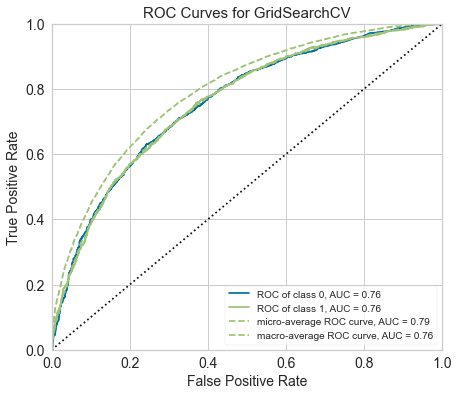

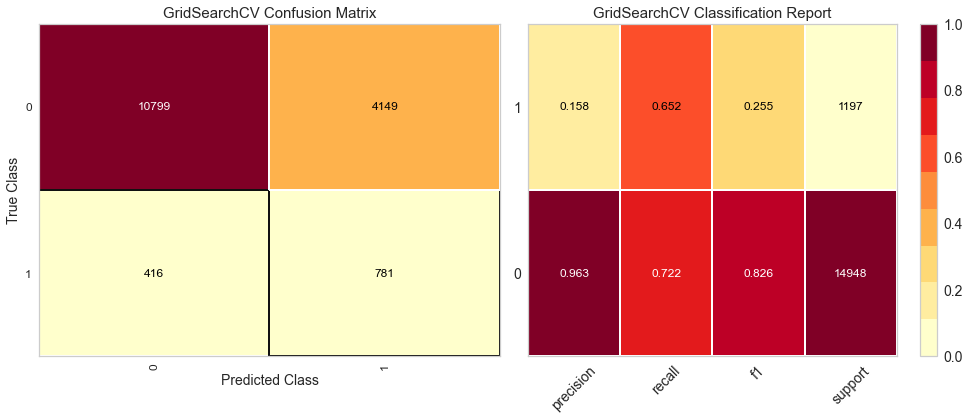

In [ ]:
results_lr_l2 = GS_eval_clf(model_lr, "Logistic Regression", data_train_smote, target_train_smote, data_test, target_test,
    refit="roc_auc", **params_lr)

In [ ]:
results_lr_l2

model_name  mean_fit_time  mean_score_time  mean_train_accuracy  \
0  Logistic Regression      989.49809          0.06306              0.73371   

   mean_train_balanced_accuracy  mean_train_roc_auc  mean_train_recall  \
0                       0.73372             0.80541            0.75077   

   mean_train_precision  mean_train_f1  test_score  test_roc_auc  \
0               0.72577        0.73805     0.75827       0.68745   

   test_accuracy  test_balanced_accuracy  test_precision  test_recall  test_f1  
0        0.71725                 0.68745         0.15842      0.65246  0.25494

3.3.2. Best l2 model cross-validation

In [83]:
model_lr = LogisticRegression(penalty="l2", solver="lbfgs", C=100, max_iter=2000, n_jobs=-2, random_state=42)

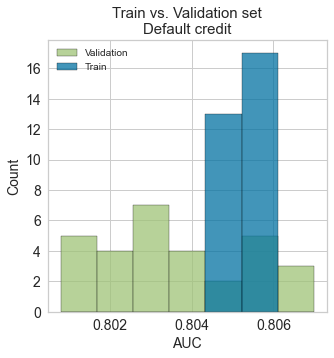

In [84]:
cv_results_lr_lbfgs, models_summary_lr_lbfgs = custom_cv(model_lr, "Logistic regression L2 lbfgs", data_train_smote, 
                                                        target_train_smote, scoring)

In [85]:
models_summary_lr_lbfgs

model_name  fit_time  score_time  train_accuracy  \
0  Logistic regression L2 lbfgs  49.02219     0.06812         0.73365   

   train_balanced_accuracy  train_roc_auc  train_recall  train_precision  \
0                  0.73365        0.80535       0.75131          0.72565   

   train_f1  test_accuracy  test_balanced_accuracy  test_roc_auc  test_recall  \
0   0.73826        0.73307                 0.73307       0.80366      0.75072   

   test_precision  test_f1  
0         0.72525  0.73775

3.3.3. Search for best C with l1 penalty

In [171]:
model_lr = LogisticRegressionCV(penalty="l1", solver="liblinear", scoring="roc_auc", refit=True,
                                max_iter=2000, n_jobs=-2, random_state=42)

Fitting model...
Logistic Regression best C: 21.544
Score : 0.76
AUC : 6.91e-01
Balanced accuracy : 6.91e-01
Recall : 6.59e-01
-----------------------------------------


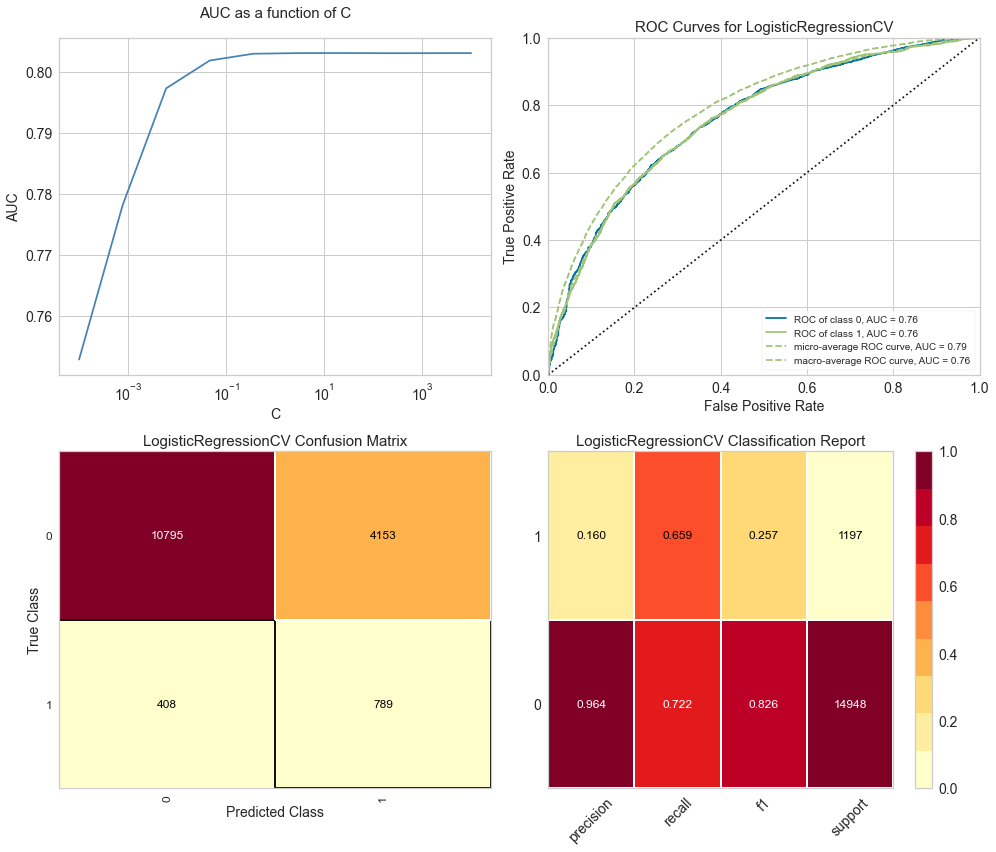

In [172]:
results_lr_auc_l1 = logisticregression_cv(model_lr, "Logistic Regression auc l1 liblinear", data_train_smote, target_train_smote,
    data_test, target_test)

In [ ]:
results_lr_auc_l1m

3.3.4. Cross-validation best l1 model

In [173]:
model_lr = LogisticRegression(penalty="l1", solver="liblinear", C=21, max_iter=2000, n_jobs=-2, random_state=42)

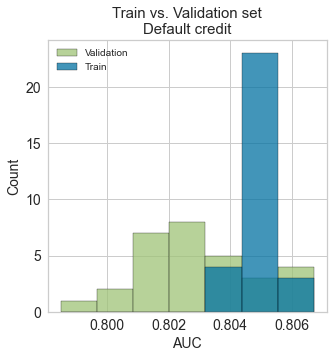

In [174]:
cv_results_lr_liblinear, models_summary_lr_liblinear = custom_cv(model_lr, "Logistic regression L1 liblinear", data_train_smote, 
                                                        target_train_smote, scoring)

In [175]:
models_summary_lr_liblinear

model_name  fit_time  score_time  train_accuracy  \
0  Logistic regression L1 liblinear  42.67881     0.08005         0.73279   

   train_balanced_accuracy  train_roc_auc  train_recall  train_precision  \
0                  0.73279        0.80495       0.74935          0.72530   

   train_f1  test_accuracy  test_balanced_accuracy  test_roc_auc  test_recall  \
0   0.73712        0.73176                 0.73176       0.80288      0.74830   

   test_precision  test_f1  
0         0.72446  0.73617

With recall as refit.

In [157]:
model_lr = LogisticRegressionCV(penalty="l2", solver="lbfgs", scoring="recall", refit=True,
                                max_iter=2000, n_jobs=-2, random_state=42)

Fitting model...
Logistic Regression best C: 21.544
Score : 0.66
AUC : 6.91e-01
Balanced accuracy : 6.91e-01
Recall : 6.59e-01
-----------------------------------------


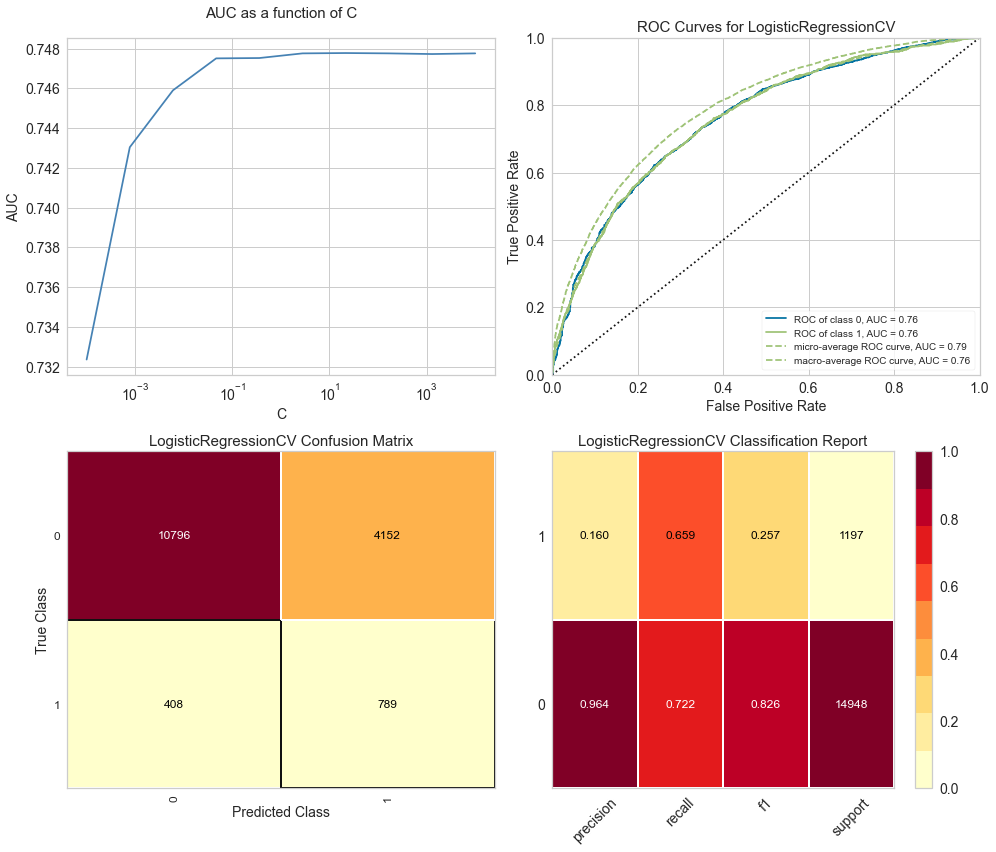

In [158]:
results_lr_recall_l2 = logisticregression_cv(model_lr, "Logistic Regression recall l2 lbfgs", data_train_smote, target_train_smote,
    data_test, target_test)

In [160]:
results_lr_recall_l2

model_name  test_score  test_roc_auc  \
0  Logistic Regression recall l2 lbfgs     0.65915       0.69069   

   test_accuracy  test_balanced_accuracy  test_precision  test_recall  test_f1  
0        0.71756                 0.69069         0.15968      0.65915  0.25709

In [176]:
model_lr = LogisticRegressionCV(penalty="l1", solver="liblinear", scoring="recall", refit=True,
                                max_iter=2000, n_jobs=-2, random_state=42)

Fitting model...
Logistic Regression best C: 0.000
Score : 0.76
AUC : 6.56e-01
Balanced accuracy : 6.56e-01
Recall : 7.64e-01
-----------------------------------------


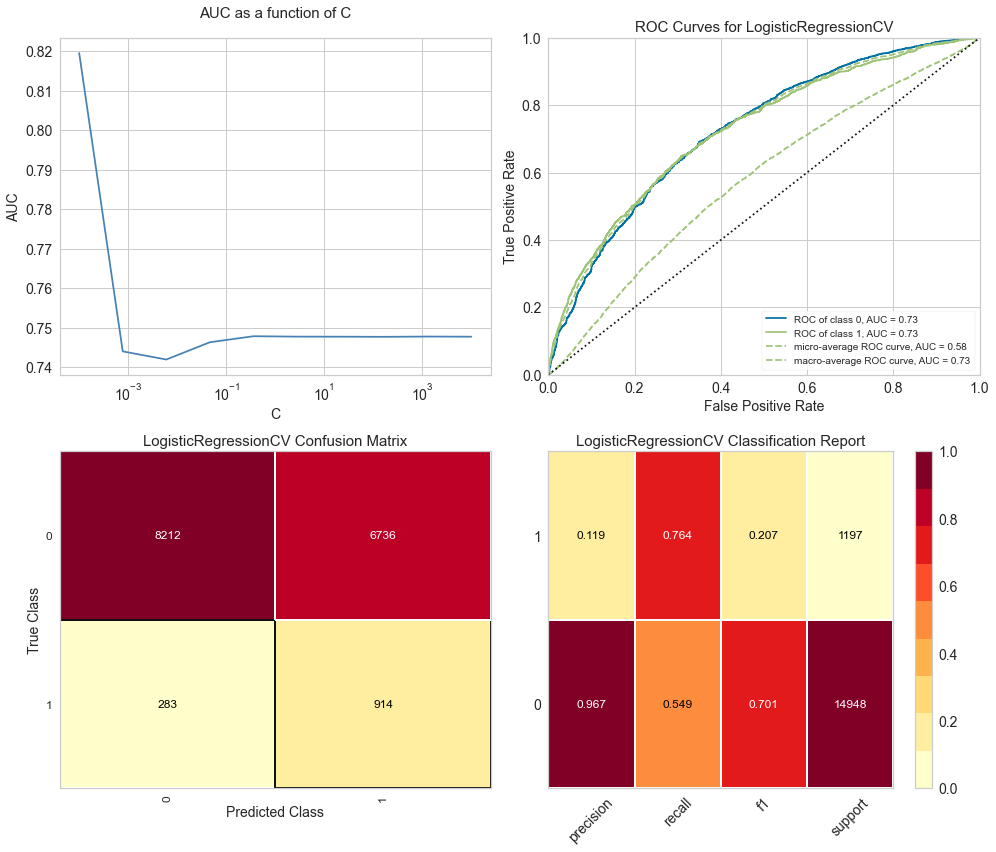

In [177]:
results_lr_recall_l1 = logisticregression_cv(model_lr, "Logistic Regression recall l1 liblinear", data_train_smote, target_train_smote,
    data_test, target_test)

In [179]:
results_lr_recall_l1

model_name  test_score  test_roc_auc  \
0  Logistic Regression recall l1 liblinear     0.76358       0.65647   

   test_accuracy  test_balanced_accuracy  test_precision  test_recall  test_f1  
0        0.56525                 0.65647         0.11948      0.76358  0.20662

Best C parameter do not vary significantly when using recall instead of AUC as metric. Results with L2 and lbfgs solver are very close to L1 with liblinear solver.

### 3.4. Linear SVC

In [33]:
model_lsvc = LinearSVC(max_iter=2000, random_state=0)

In [46]:
params_lsvc = {"scoring": scoring,
                "n_jobs": -2,
                "param_grid": {"penalty": ["l1", "l2"],
                                "C": [0.1, 10]}
                }

In [48]:
#lsvc_results = GS_eval_clf(model_lsvc, "Linear SVC", data_train_smote, target_train_smote, data_test, target_test,
#    refit="roc_auc", **params_lsvc)

In [49]:
#lsvc_results

### 3.4. Random Forest

Testing Random Forest model.

In [37]:
model_rf = RandomForestClassifier(max_depth=8, n_jobs=-2, random_state=42)

In [38]:
params_rf = {"scoring": scoring,
            "n_jobs": -2,
            "param_grid": {"n_estimators": [100, 150, 200],
                            "max_features": [0.2, 0.3, 0.6]}
            }

Making Shuffle Split...
GridSearchCV start...
Best params: {'max_features': 0.4, 'n_estimators': 150}
Score : 0.69
AUC : 5.64e-01
Balanced accuracy : 5.64e-01
Recall : 1.90e-01
-----------------------------------------


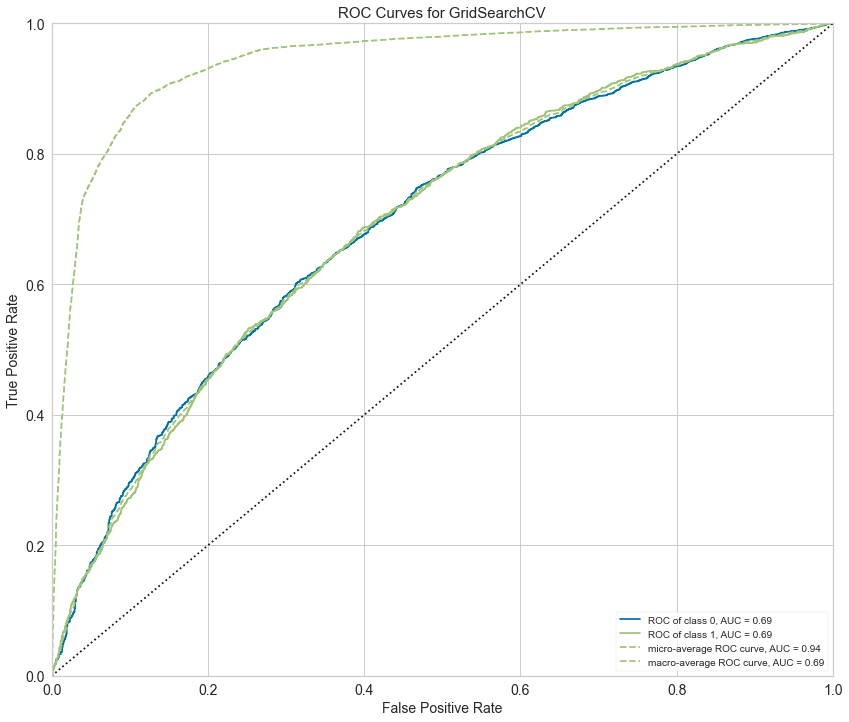

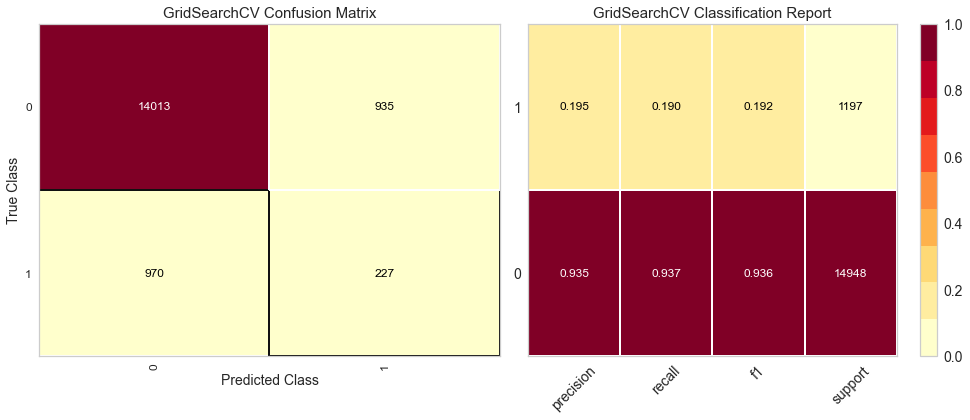

In [39]:
results_rf = GS_eval_clf(model_rf, "Random Forest", data_train_smote, target_train_smote, data_test, target_test, 
    refit="roc_auc", **params_rf)

In [40]:
results_rf

model_name  mean_fit_time  mean_score_time  mean_train_accuracy  \
0  Random Forest        192.836            1.321                0.908   

   mean_train_balanced_accuracy  mean_train_roc_auc  mean_train_recall  \
0                         0.908               0.967              0.876   

   mean_train_precision  mean_train_f1  test_score  test_roc_auc  \
0                 0.935          0.905       0.694         0.564   

   test_accuracy  test_balanced_accuracy  test_precision  test_recall  test_f1  
0          0.882                   0.564           0.195        0.190    0.192

In [87]:
best_model_rf = RandomForestClassifier(max_depth=8, min_samples_leaf=4, max_features=0.4, n_estimators=150,
    n_jobs=-2, random_state=42)

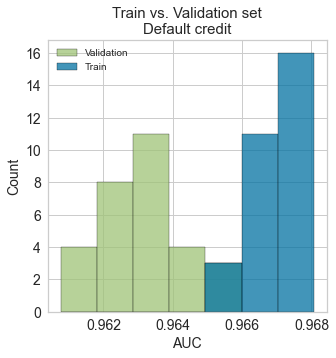

In [88]:
cv_results_rf, models_summary_rf = custom_cv(best_model_rf, "Random Forest", data_train_smote, 
                                                        target_train_smote, scoring)

Tests RF

In [324]:
model_rf = RandomForestClassifier(max_depth=8, max_features=0.3, n_estimators=150, min_impurity_decrease=0.02, 
    n_jobs=-2, random_state=42)

In [325]:
model_rf.fit(data_train_smote, target_train_smote)

target_predicted_rf = model_rf.predict(data_test)

In [326]:
target_predicted_rf_proba = model_rf.predict_proba(data_test)

In [327]:
# Compute scores and evaluation
score_test_rf = model_rf.score(data_test, target_test)
bal_accuracy_test_rf = balanced_accuracy_score(target_test, target_predicted_rf)
recall_rf = recall_score(target_test, target_predicted_rf)
classif_report_test_rf = classification_report(target_test, target_predicted_rf, output_dict=True,
                                                zero_division=0)
roc_auc_rf = roc_auc_score(target_test, target_predicted_rf)
confusion_rf = confusion_matrix(target_test, target_predicted_rf)

In [322]:
print(f"Random Forest Classifier")
print(f"Score: {score_test_rf:.7f}")
print(f"Balanced accuracy: {bal_accuracy_test_rf:.7f}")
print(f"ROC AUC: {roc_auc_rf:.7f}")
print(f"Recall: {recall_rf:.7f}")

Random Forest Classifier
Score: 0.7653763
Balanced accuracy: 0.6112276
ROC AUC: 0.6112276
Recall: 0.4302423


In [323]:
pd.DataFrame(confusion_rf)

0     1
0  11842  3106
1    682   515

New grid search with more focus parameters.

In [330]:
model_rf = RandomForestClassifier(max_depth=8, n_jobs=-2, random_state=42)

In [331]:
params_rf = {"scoring": scoring,
            "n_jobs": -2,
            "param_grid": {"n_estimators": [125, 150, 175],
                            "max_features": [0.25, 0.3, 0.35],
                            "min_impurity_decrease": [0.015, 0.02, 0.025]}
            }

Making Shuffle Split...
GridSearchCV start...
Best params: {'max_features': 0.25, 'min_impurity_decrease': 0.015, 'n_estimators': 175}
Score : 0.66
AUC : 6.12e-01
Balanced accuracy : 6.12e-01
Recall : 3.91e-01
-----------------------------------------


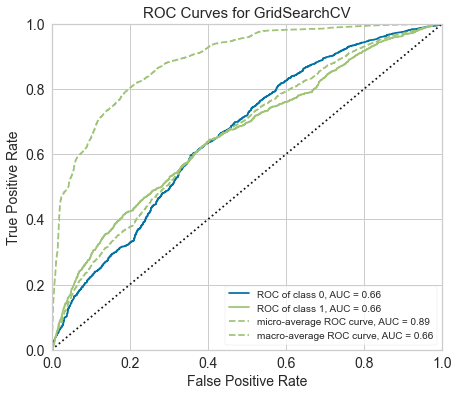

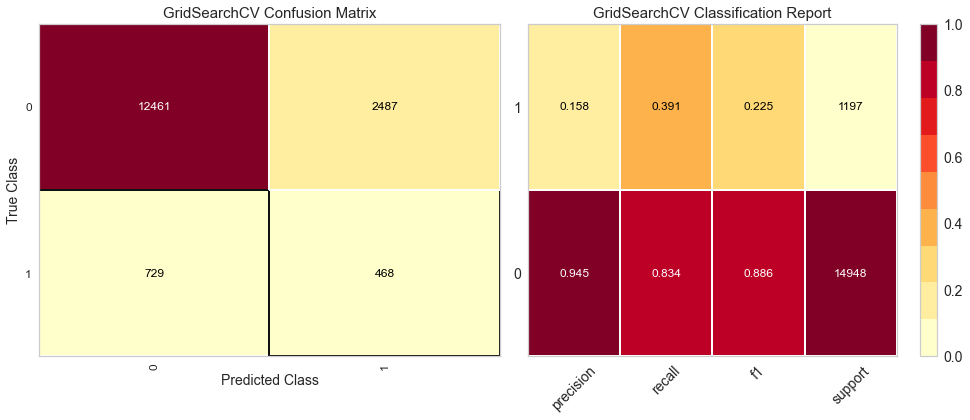

In [332]:
results_rf = GS_eval_clf(model_rf, "Random Forest", data_train_smote, target_train_smote, data_test, target_test, 
    refit="roc_auc", **params_rf)

In [334]:
results_best_rf = results_rf
results_best_rf["params"] = "max_depth=8, max_features=0.25, min_impurity_decrease=0.015, n_estimators=175"

In [335]:
results_best_rf

model_name  mean_fit_time  mean_score_time  mean_train_accuracy  \
0  Random Forest       80.73961          1.52385              0.81647   

   mean_train_balanced_accuracy  mean_train_roc_auc  mean_train_recall  \
0                       0.81645             0.89570            0.80815   

   mean_train_precision  mean_train_f1  test_score  test_roc_auc  \
0               0.82179        0.81485     0.65865       0.61230   

   test_accuracy  test_balanced_accuracy  test_precision  test_recall  \
0        0.80081                 0.61230         0.15838      0.39098   

   test_f1                                             params  
0  0.22543  max_depth=8, max_features=0.25, min_impurity_d...

New cross-validations

In [121]:
model_rf = RandomForestClassifier(max_depth=8, max_features=0.3, n_estimators=150, min_impurity_decrease=0.02, 
    n_jobs=-2, random_state=42)

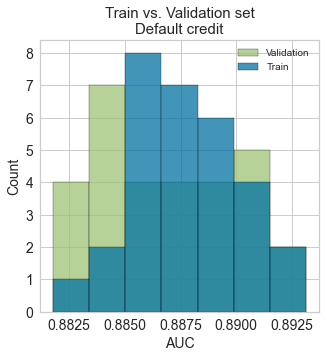

In [338]:
cv_results_rf, models_summary_rf = custom_cv(model_rf, "Random Forest", data_train_smote, 
                                                        target_train_smote, scoring)

In [339]:
models_summary_rf

model_name  fit_time  score_time  train_accuracy  \
0  Random Forest  69.70857     0.96951         0.80727   

   train_balanced_accuracy  train_roc_auc  train_recall  train_precision  \
0                  0.80726        0.88772       0.81336          0.80368   

   train_f1  test_accuracy  test_balanced_accuracy  test_roc_auc  test_recall  \
0   0.80843        0.80626                 0.80629       0.88690      0.81177   

   test_precision  test_f1  
0         0.80319  0.80737

In [346]:
model_rf = RandomForestClassifier(max_depth=8, max_features=0.25, n_estimators=175, min_impurity_decrease=0.015, 
    n_jobs=-2, random_state=42)

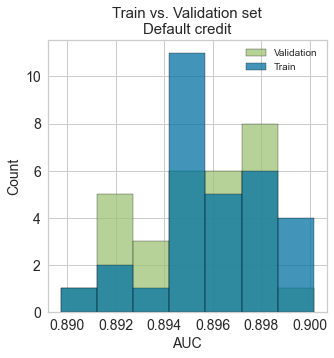

In [347]:
cv_results_rf2, models_summary_rf2 = custom_cv(model_rf, "Random Forest", data_train_smote, 
                                                        target_train_smote, scoring)

In [348]:
models_summary_rf2

model_name  fit_time  score_time  train_accuracy  \
0  Random Forest  76.50066     0.70280         0.81881   

   train_balanced_accuracy  train_roc_auc  train_recall  train_precision  \
0                  0.81881        0.89605       0.80869          0.82545   

   train_f1  test_accuracy  test_balanced_accuracy  test_roc_auc  test_recall  \
0   0.81695        0.81785                 0.81786       0.89531      0.80751   

   test_precision  test_f1  
0         0.82474  0.81599

#### Feature importance of Random Forest

In [124]:
model_rf = RandomForestClassifier(max_depth=8, max_features=0.25, n_estimators=175, min_impurity_decrease=0.015, 
    n_jobs=-2, random_state=42)

In [125]:
model_rf.fit(data_train_smote, target_train_smote)

RandomForestClassifier(max_depth=8, max_features=0.25,
                       min_impurity_decrease=0.015, n_estimators=175, n_jobs=-2,
                       random_state=42)

In [136]:
# Plot
x, y = (list(x) for x in zip(*sorted(zip(model_rf.feature_importances_, new_features_names), reverse = False)))
trace = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
     yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True)
)

fig1 = go.Figure(data=[trace])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

### 3.5. LightGBM

Testing LGBM Classifier.

In [151]:
model_lgbm = LGBMClassifier(objective="binary", n_estimators=10000, n_jobs=-2, random_state=42,
                            learning_rate=1,
                            num_leaves=36,
                            colsample_bytree=0.9,
                            #subsample=0.3,
                            max_depth=8,
                            reg_alpha=0.5,
                            reg_lambda=0.073,
                            min_split_gain=0.022,
                            min_child_weight=39.33)

In [152]:
model_lgbm.fit(data_train_smote, target_train_smote)

target_predicted_lgbm = model_lgbm.predict(data_test)

In [153]:
# Compute scores and evaluation
score_test_lgbm = model_lgbm.score(data_test, target_test)
bal_accuracy_test_lgbm = balanced_accuracy_score(target_test, target_predicted_lgbm)
classif_report_test_lgbm = classification_report(target_test, target_predicted_lgbm, output_dict=True,
                                                zero_division=0)
roc_auc_lgbm = roc_auc_score(target_test, target_predicted_lgbm)
confusion_lgbm = confusion_matrix(target_test, target_predicted_lgbm)

In [154]:
print(f"LGBMClassifier")
print(f"Score: {score_test_lgbm:.7f}")
print(f"Balanced accuracy: {bal_accuracy_test_lgbm:.7f}")
print(f"ROC AUC: {roc_auc_lgbm:.7f}")

LGBMClassifier
Score: 0.9049861
Balanced accuracy: 0.5379131
ROC AUC: 0.5379131


In [155]:
classif_report_test_lgbm = pd.DataFrame(classif_report_test_lgbm)
classif_report_test_lgbm

0          1  accuracy   macro avg  weighted avg
precision     0.93126    0.21585   0.90499     0.57356       0.87822
recall        0.96889    0.10693   0.90499     0.53791       0.90499
f1-score      0.94970    0.14302   0.90499     0.54636       0.88990
support   14948.00000 1197.00000   0.90499 16145.00000   16145.00000

In [156]:
pd.DataFrame(confusion_lgbm)

0    1
0  14483  465
1   1069  128

In [54]:
#learning_rate: [0.2,  0.5, 0.7, 0.9, 1, 1.2]
#ROC_AUC: [0.528, 0.534, 0.539, 0.542, 0.545, 0.540]
#1/1: [81, 101, 118, 130, 142, 140]

#learning_rate: [1]
#colsample_bytree: [0.9]
#num_leaves: [34, 36, 38, 37]
#ROC_AUC: [0.545, 0.548, 0.539, 0.536]
#1/1: [142, 150, 131, 123]

#learning_rate: [1]
#num_leaves: [36]
#colsample_bytree: [0.9, 0.7, 1]
#ROC_AUC: [0.548, 0.546, 0.542]
#1/1: [150, 146, 140]

#learning_rate: [1]
#num_leaves: [36]
#colsample_bytree: [0.9]
#subsample: [0.9, 0.7, 0.5, 0.3]
#ROC_AUC: [0.548, 0.548, 0.548, 0.548]
#1/1: [150, 150, 150, 150]

#learning_rate: [1]
#num_leaves: [36]
#colsample_bytree: [0.9]
#subsample: [0.3]
#reg_alpha: [0.0415, 0.1, 0.5]
#ROC_AUC: [0.548, 0.5479, 0.5379]
#1/1: [150, 151, 128]


In [ ]:
#learning_rate=0.02,
#num_leaves=34,
#colsample_bytree=0.9497036,
#subsample=0.8715623,
#max_depth=8,
#reg_alpha=0.041545473,
#reg_lambda=0.0735294,
#min_split_gain=0.0222415,
#min_child_weight=39.3259775

In [27]:
model_lgbm = LGBMClassifier(objective="binary", n_estimators=10000, n_jobs=-2, random_state=42)

In [32]:
params_lgbm = {"scoring": scoring,
            "n_jobs": -2,
            "param_grid": {"learning_rate": [0.01, 0.01, 1],
                            "subsample": [0.4, 0.6, 0.8],
                            "subsample_freq": [1, 2, 5]}
            }

Making Shuffle Split...
GridSearchCV start...
Best params: {'learning_rate': 0.01, 'subsample': 0.6, 'subsample_freq': 1}
Score : 0.76
AUC : 5.20e-01
Balanced accuracy : 5.20e-01
Recall : 4.34e-02
-----------------------------------------


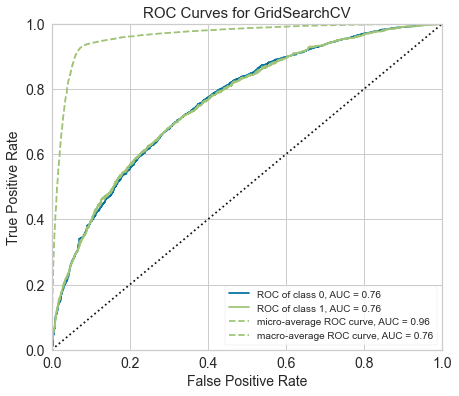

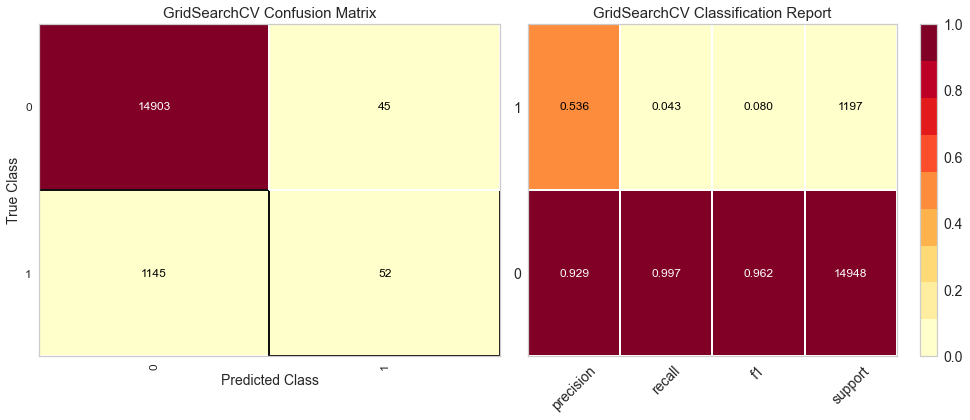

In [33]:
results_lgbm = GS_eval_clf(model_lgbm, "LightGBM", data_train_smote, target_train_smote, data_test, target_test, 
    refit="roc_auc", **params_lgbm)

In [ ]:
# results_lgbm_01.csv
#{"learning_rate": [0.01, 0.01, 1],
                    #"subsample": [0.4, 0.6, 0.8],
                    #"subsample_freq": [1, 2, 5]}
#Best params: {'learning_rate': 0.01, 'subsample': 0.6, 'subsample_freq': 1}
#Score : 0.76
#AUC : 5.20e-01
#Balanced accuracy : 5.20e-01
#Recall : 4.34e-02

In [35]:
results_lgbm

model_name  mean_fit_time  mean_score_time  mean_train_accuracy  \
0   LightGBM      412.21536        110.43545              1.00000   
1        NaN      446.41809        121.45239              1.00000   

   mean_train_balanced_accuracy  mean_train_roc_auc  mean_train_recall  \
0                       1.00000             1.00000            1.00000   
1                       1.00000             1.00000            1.00000   

   mean_train_precision  mean_train_f1  test_score  test_roc_auc  \
0               1.00000        1.00000     0.76009       0.52022   
1               1.00000        1.00000         NaN           NaN   

   test_accuracy  test_balanced_accuracy  test_precision  test_recall  test_f1  
0        0.92629                 0.52022         0.53608      0.04344  0.08037  
1            NaN                     NaN             NaN          NaN      NaN

In [36]:
path_results_lgbm_01 = os.path.join(path_to_csv, "results_lgbm_01.csv")
results_lgbm.to_csv(path_results_lgbm_01)

## 4. Creation of cost function

To better evaluate the models, we will build a cost function taking into account gains and losses (coefficients) multipled by the number of clients for each case of the confusion matrix.
The following gains and losses will be taken into account:

![table](./confusion_costs.png)

Our cost function will be the total revenue of a model such as:

R = (mean interests) * TN - (mean interests) * FP - (mean debt default loans + mean debt interests) * FN

In [60]:
# Calculate the % of credit not repaid after default
mean_debt = bureau["AMT_CREDIT_SUM_DEBT"].mean()
mean_credit = bureau["AMT_CREDIT_SUM"].mean()
perc_debt = mean_debt/mean_credit * 100
print(f"People are generally indebt of {perc_debt:.1f} % of their credit.")

People are generally indebt of 38.6 % of their credit.


In [61]:
# Calculate mean credit for clients making default ant the others
mean_credit_default = app_train[app_train["TARGET"]==1]["AMT_CREDIT"].mean()
mean_credit_repaid = app_train[app_train["TARGET"]==0]["AMT_CREDIT"].mean()
print(f"Mean credit of client who repay their loans: {mean_credit_repaid:.0f} $.")
print(f"Mean credit of client who make default: {mean_credit_default:.0f} $.")

Mean credit of client who repay their loans: 602648 $.
Mean credit of client who make default: 557779 $.


We can now calculate the mean loan debt in dollars.

In [62]:
mean_debt = perc_debt * mean_credit_default /100
print(f"Mean debt: {mean_debt:.0f} $.")

Mean debt: 215392 $.


Having a look at interests for repaid and default loans.

In [63]:
interest_primary_default = app_prev_train[app_prev_train["TARGET"]==1]["RATE_INTEREST_PRIMARY"].mean()
interest_primary_repaid = app_prev_train[app_prev_train["TARGET"]==0]["RATE_INTEREST_PRIMARY"].mean()

interest_privileged_default = app_prev_train[app_prev_train["TARGET"]==1]["RATE_INTEREST_PRIVILEGED"].mean()
interest_privileged_repaid = app_prev_train[app_prev_train["TARGET"]==0]["RATE_INTEREST_PRIVILEGED"].mean()

interests = pd.DataFrame({"Primary interests": [interest_primary_repaid, interest_primary_default],
                            "Privileged interests": [interest_privileged_repaid, interest_privileged_default]},
                            index=["0 (default)", "1 (repaid)"])
interests

Primary interests  Privileged interests
0 (default)            0.18948               0.77043
1 (repaid)             0.18899               0.78097

There is a large difference between primary and privileged interests, but not significant between repaid and non repaid loan. We will use the mean interest rate of all categories and targets.

Mean interest rate USA in 2018: 4.904 %

So need to multiply by 10...

Source: https://data.worldbank.org/indicator/FR.INR.LEND?end=2020&locations=US&start=1960

In [64]:
mean_interest = pd.concat([previous_app["RATE_INTEREST_PRIMARY"], previous_app["RATE_INTEREST_PRIVILEGED"]]).mean()*10
print(f"The mean interest rate is {mean_interest:.2f} %.")

The mean interest rate is 4.81 %.


We have all we need to calculate our coefficients.

In [65]:
# Interests for TN and TP
mean_interest_repaid = mean_interest * mean_credit_repaid / 100
mean_interest_default = mean_interest * mean_credit_default / 100

# Debts for FN
mean_debt_loan = perc_debt * mean_credit_default / 100
mean_debt_interest = perc_debt * mean_interest_default / 100
total_debt = mean_debt_loan + mean_debt_interest

In [66]:
print(f"Mean interest for repaid loans: {mean_interest_repaid:.0f} $.")
print(f"Mean total debt for default loans: {total_debt:.0f} $.")

Mean interest for repaid loans: 28983 $.
Mean total debt for default loans: 225751 $.


Our coefficients will therefore be:

![table](./confusion_costs_coefs.png)

With cost function such as:

R = TN * 2898 - FP * 2898 - FN * 216428

In [67]:
# Making our cost function
def score_loans(y_true, y_pred):
    confusion = confusion_matrix(y_true, y_pred)
    score = confusion[0][0] * 28983 - confusion[1][0] * 28983 - confusion[0][1] * 216428
    return score

score_function = make_scorer(score_loans)

## 5. Modeling with home-made cost function

### 5.1. Logistic regression

#### 5.1.1 L1 liblinear

In [385]:
model_lr = LogisticRegressionCV(penalty="l1", solver="liblinear", scoring=score_function, refit=True, 
                                max_iter=2000, n_jobs=-2, random_state=42)

Fitting model...
Logistic Regression best C: 1291.550
Score : -597259258.00
AUC : 6.91e-01
Balanced accuracy : 6.91e-01
Recall : 6.60e-01
-----------------------------------------


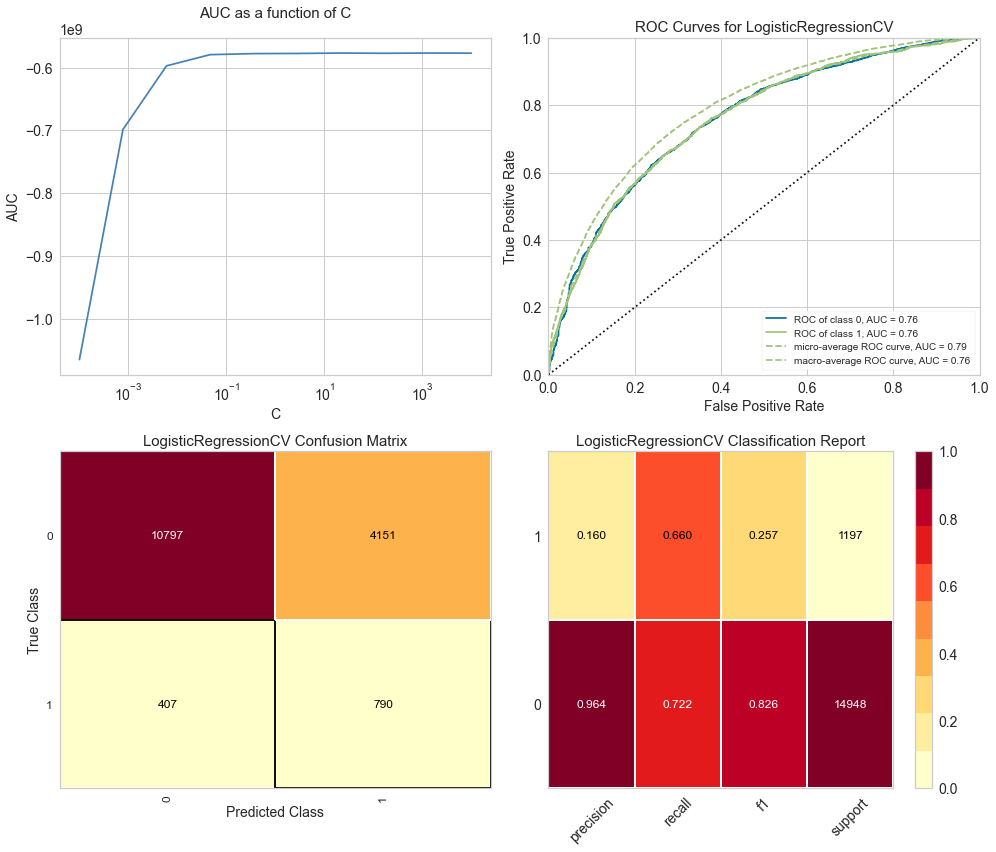

In [386]:
results_lr_myscore_l1 = logisticregression_cv(model_lr, "Logistic Regression MyScore l1 liblinear", 
    data_train_smote, target_train_smote, data_test, target_test)

In [387]:
results_lr_myscore_l1

model_name  test_score  test_roc_auc  \
0  Logistic Regression MyScore l1 liblinear  -597259258       0.69114   

   test_accuracy  test_balanced_accuracy  test_precision  test_recall  test_f1  
0        0.71768                 0.69114         0.15989      0.65998  0.25741

#### 5.1.2. L2 lbfgs

In [68]:
model_lr = LogisticRegressionCV(penalty="l2", solver="lbfgs", scoring=score_function, refit=True, 
                                max_iter=2000, n_jobs=-2, random_state=42)

Fitting model...
Logistic Regression best C: 0.359
Score : -592928809.00
AUC : 6.90e-01
Balanced accuracy : 6.90e-01
Recall : 6.57e-01
-----------------------------------------


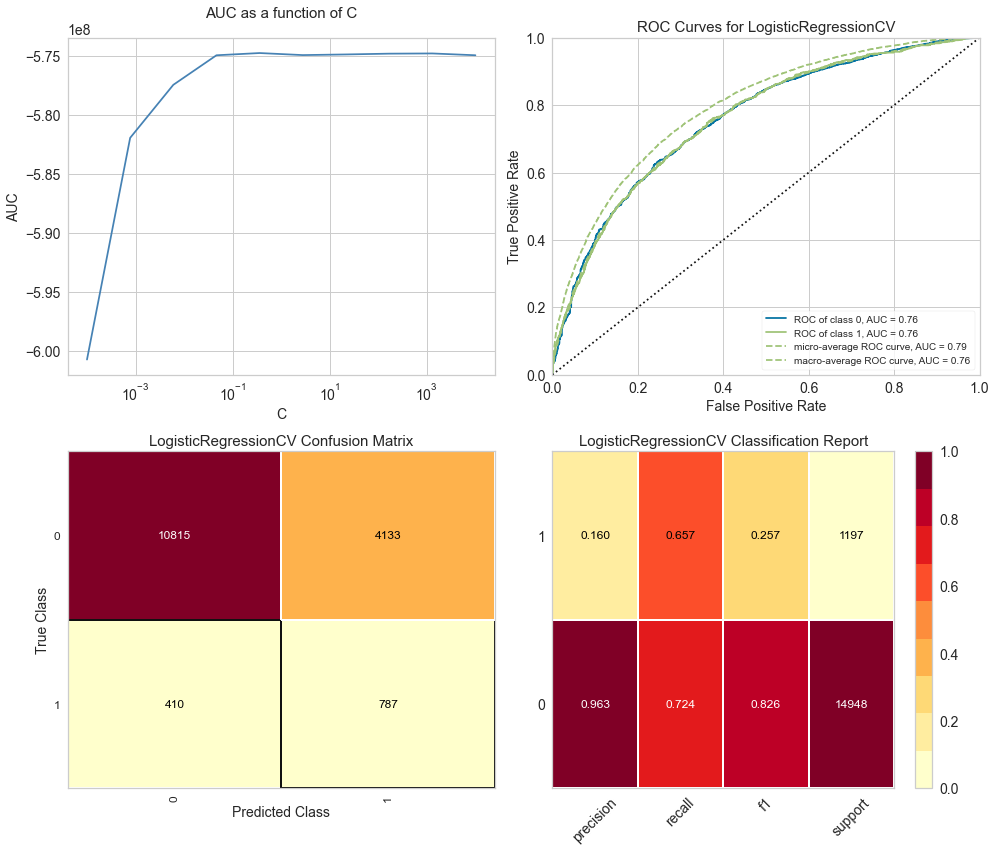

In [69]:
results_lr_myscore_l2 = logisticregression_cv(model_lr, "Logistic Regression MyScore l2 lbfgs", 
    data_train_smote, target_train_smote, data_test, target_test)

In [70]:
results_lr_myscore_l2

model_name  test_score  test_roc_auc  \
0  Logistic Regression MyScore l2 lbfgs  -592928809       0.69049   

   test_accuracy  test_balanced_accuracy  test_precision  test_recall  test_f1  
0        0.71861                 0.69049         0.15996      0.65748  0.25732

### 5.2. Random Forest

In [43]:
model_rf = RandomForestClassifier(max_depth=8, n_jobs=-2, random_state=42)

In [34]:
params_rf = {"scoring": score_function,
            "n_jobs": -2,
            "param_grid": {"n_estimators": [100, 150, 200],
                            "max_features": [0.2, 0.3, 0.4],
                            "min_impurity_decrease": [0.01, 0.02, 0.03]}
            }

In [73]:
#results_rf_myscore = GS_eval_clf(model_rf, "Random Forest", data_train_smote, target_train_smote, data_test, target_test, 
#    refit=score_function, **params_rf)

In [78]:
def refit_best_index(cv_results):
    """
    Refit function when using home-made callable scorer.
    Take cross-validation results and return best_index_.
    """
    cv_results = pd.DataFrame(cv_results)
    best_index = list(cv_results[cv_results["rank_test_score"]==1].index)[0]
    
    return best_index

In [44]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [45]:
grid = {"n_estimators": [100, 150, 200],
        "max_features": [0.2, 0.3, 0.4],
        "min_impurity_decrease": [0.01, 0.02, 0.03]}

In [52]:
small_grid = {"n_estimators": [50, 100],
        "max_features": [0.2, 0.3]}

In [79]:
model_grid_search = GridSearchCV(model_rf, cv=cv, refit=refit_best_index, return_train_score=True, 
                                param_grid=small_grid, scoring=score_function)

In [80]:
# Fit model and get best params:
model_grid_search.fit(data_train_smote, target_train_smote)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
             estimator=RandomForestClassifier(max_depth=8, n_jobs=-2,
                                              random_state=42),
             param_grid={'max_features': [0.2, 0.3], 'n_estimators': [50, 100]},
             refit=<function refit_best_index at 0x0000021F8EA11820>,
             return_train_score=True, scoring=make_scorer(score_loans))

In [82]:
print(f"Best params: {model_grid_search.best_params_}")

Best params: {'max_features': 0.2, 'n_estimators': 100}


In [83]:
model_grid_search.best_index_

1

In [85]:
pd.DataFrame(model_grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       14.84678       0.59842          0.09115         0.00546   
1       32.10913       1.47749          0.15604         0.01605   
2       22.22626       1.31457          0.10346         0.03009   
3       46.12843       2.44143          0.15766         0.01034   

  param_max_features param_n_estimators  \
0            0.20000                 50   
1            0.20000                100   
2            0.30000                 50   
3            0.30000                100   

                                       params  split0_test_score  \
0   {'max_features': 0.2, 'n_estimators': 50}    111646123.00000   
1  {'max_features': 0.2, 'n_estimators': 100}    134082798.00000   
2   {'max_features': 0.3, 'n_estimators': 50}     94521865.00000   
3  {'max_features': 0.3, 'n_estimators': 100}    119893703.00000   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0    140915878.00000    110593614.00000    146185441.00000    125702609.00000   
1    146546784.00000    127588717.00000    141107101.00000    139621412.00000   
2    136530000.00000    108789436.00000    110655358.00000     97378607.00000   
3    132023440.00000    111730266.00000    110522101.00000    116427725.00000   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0  127008733.00000  14617295.84751                2     464690718.00000   
1  137789362.40000   6462940.73101                1     547523380.00000   
2  109575053.20000  14857356.32426                4     416307619.00000   
3  118119447.00000   7718448.40777                3     504112134.00000   

   split1_train_score  split2_train_score  split3_train_score  \
0     563697838.00000     502534422.00000     617122145.00000   
1     557724803.00000     578551653.00000     586457104.00000   
2     540159864.00000     512753549.00000     496451177.00000   
3     519666291.00000     529670500.00000     495825209.00000   

   split4_train_score  mean_train_score  std_train_score  
0     493036471.00000   528216318.80000   54947006.48538  
1     562632699.00000   566577927.80000   14110777.31684  
2     381394383.00000   469413318.40000   60302642.39348  
3     466215214.00000   503097869.60000   21885464.96032

In [ ]:
# Get train scores for all metrics:
cv_results = pd.DataFrame(model_grid_search.cv_results_)
best_model_results = cv_results[rank_refit]==1
train_results = cv_results[best_model_results][train_scores]
train_results.reset_index(inplace=True)

In [ ]:
# Use model with best params to evaluate it on a separate test set:
target_predicted = model_grid_search.predict(data_test)

### 5.3. LGBM

In [31]:
model_lgbm = LGBMClassifier(objective="binary", n_estimators=10000, n_jobs=-2, random_state=42)

In [ ]:
params_lgbm = {"scoring": score_function,
            "n_jobs": -2,
            "param_grid": {"learning_rate": [0.01, 0.1, 1],
                            "subsample": [0.4, 0.6, 0.8]}
            }

## 6. Features importance

We will use a feature explainer to be able to clarify individual feature importance in the attribution (or not) of credit. This should help insurer to justify their decision to clients (especially in the case of credit refusal).

In [29]:
# Fit our best model
best_model_lr = LogisticRegression(penalty="l2", solver="lbfgs", C=0.359, max_iter=2000, n_jobs=-2, random_state=42)
best_model_lr.fit(data_train_smote, target_train_smote)

In [37]:
#data_train_smote_df = pd.DataFrame(data_train_smote, columns=new_features_names)

In [54]:
# Sample data
train_sample = shap.sample(data_train_smote, 400)
test_sample = shap.sample(data_test, 50)
test_sample_df = pd.DataFrame(test_sample)

In [51]:
masker = shap.maskers.Independent(data=test_sample)

In [55]:
# Build our explainer
lr_explainer1 = shap.KernelExplainer(best_model_lr.predict, train_sample)

Using 400 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [63]:
# Explain all our test values
shap_vals = lr_explainer1.shap_values(test_sample)

# Base value
exp1_expected = lr_explainer1.expected_value
print("Base Value: ", exp1_expected)

100%|██████████| 50/50 [04:52<00:00,  5.85s/it]


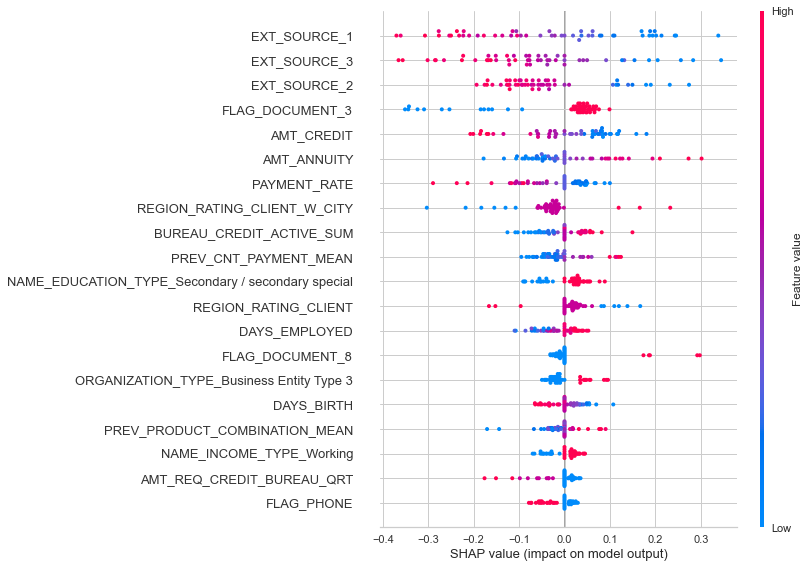

In [64]:
shap.summary_plot(shap_vals, test_sample_df, feature_names=new_features_names)

The data coming from external sources are the most important. Then come wether the client filled out the 3rd document or not, then amount of credit, annuity and payment rate. Other important features are related to client employment situation, previous credits balance, age, region, education.

In [119]:
shap.plots.force(exp1_expected, 
                shap_vals, 
                feature_names=new_features_names)

We can test the feature importance for a single client:

In [104]:
# For one client only
sample_id = 1000

explained_sample = lr_explainer1.shap_values(data_test[sample_id])

print("Sample id:", sample_id)
print("Prediction From Model: ", best_model_lr.predict(data_test[sample_id].reshape(1,-1))[0])
print("Prediction From Adding SHAP Values to Base Value: ", lr_explainer1.expected_value + shap_vals.sum())

Sample id: 1000
Base Value:  0.5575
Prediction From Model:  0
Prediction From Adding SHAP Values to Base Value:  -13.3175


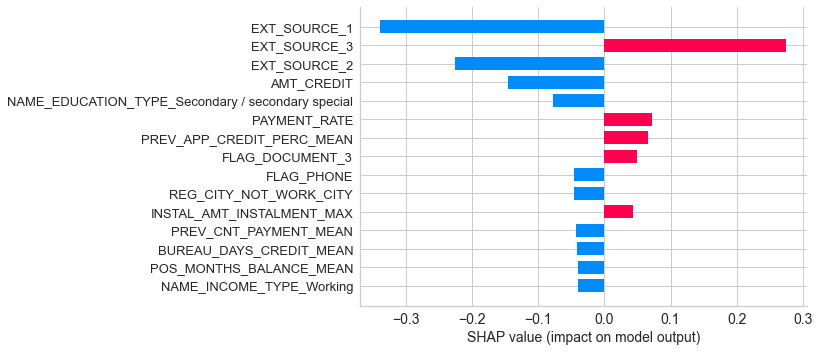

In [105]:
shap.bar_plot(explained_sample,
              feature_names=new_features_names,
              max_display=15)

In [106]:
shap.plots.force(exp1_expected, 
                explained_sample, 
                feature_names=new_features_names)

In [138]:
shap.waterfall_plot(lr_explainer1,
                    #feature_names=new_features_names,
                    max_display=15)

AttributeError: 'Kernel' object has no attribute 'base_values'

In [140]:
shap.plots.partial_dependence(5, shap_vals, test_sample)

TypeError: 'numpy.ndarray' object is not callable

In [87]:
lr_explainer2 = shap.LinearExplainer(best_model_lr.predict, feature_perturbation="correlation_dependent", masker=masker)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


Exception: An unknown model type was passed: <class 'method'>

In [ ]:
sample_idx = 0

shap_vals = lr_explainer2.shap_values(data_test[sample_idx].reshape(1,-1))[0]

print("Base Value : ", lr_explainer2.expected_value)
print("Prediction From Model: ", best_model_lr.predict(data_test[sample_idx].reshape(1,-1))[0])
print("Prediction From Adding SHAP Values to Base Value : ", lr_explainer2.expected_value + shap_vals.sum())

In [ ]:
shap.bar_plot(lr_explainer1.shap_values(data_test[0]),
              feature_names=new_feature_names,
              max_display=len(new_feature_names))

In [ ]:
shap.bar_plot(lr_explainer2.shap_values(data_test[0].reshape(1,-1))[0],
              feature_names=new_feature_names,
              max_display=len(new_feature_names))